

# Project: IMDB Movies Data Analysis
> In this Project I will try to answer some questions in an analytic way  using variety of graphs.
> The data needs cleaning first and there is alot of not important columns needs to be handled.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Questions to be Answered.
>### - Does the film industry improves over time?
>### - What is the most profitable season?
>### - Top 15 Lists. (Movies and Directors)

<a id='intro'></a>
## Introduction

#### Import important libraries and read the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
imdb_df = pd.read_csv('imdb_movies.csv')
imdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

>
#### First I dropped unused columns.

In [3]:
imdb_df.drop(['homepage', 'imdb_id', 'genres', 'tagline', 'production_companies', 'keywords', 'cast', 'overview', 'id'], axis=1, inplace=True)
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


>
#### Is there any duplicates in the data?

In [4]:
print('Num of duplicates = {}'.format(imdb_df.duplicated().sum()))

Num of duplicates = 1


In [5]:
imdb_df.drop_duplicates(inplace=True)
print('Num of duplicates = {}'.format(sum(imdb_df.duplicated())))

Num of duplicates = 0


>
#### Now it's time to deal with `NANs` and `zeroes` in the data, there is a huge number of zeroes and small number of NANs...

In [6]:
imdb_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [7]:
imdb_df = imdb_df.replace(0, np.nan)
imdb_df = imdb_df.dropna()
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3853 non-null   float64
 1   budget          3853 non-null   float64
 2   revenue         3853 non-null   float64
 3   original_title  3853 non-null   object 
 4   director        3853 non-null   object 
 5   runtime         3853 non-null   float64
 6   release_date    3853 non-null   object 
 7   vote_count      3853 non-null   int64  
 8   vote_average    3853 non-null   float64
 9   release_year    3853 non-null   int64  
 10  budget_adj      3853 non-null   float64
 11  revenue_adj     3853 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 391.3+ KB


#### Now the data is cleaned but I will expand the `director` column maybe I use it in the analysys.

#### Here I need only the `main director` so I dropped all except the main one.

In [8]:
director_col = imdb_df['director'].str.split('|', expand=True)
director_col.rename(columns={0:'Director'}, inplace=True)
director_col.drop(columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], axis=1, inplace=True)
director_col

,Director
0,Colin Trevorrow
1,George Miller
2,Robert Schwentke
3,J.J. Abrams
4,James Wan
...,...
10822,Mike Nichols
10828,Alfred Hitchcock
10829,Howard Hawks
10835,Robert Wise


>
#### Joinning all the dataframes together and drop the original colomn as I will use the new one.

In [9]:
imdb_df = imdb_df.join([director_col])
imdb_df = imdb_df.drop(['director'], axis=1)
imdb_df.head(2)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Director
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Colin Trevorrow
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,George Miller


>
#### Convert `release_date` dtype from object into `datetime64`.

In [10]:
imdb_df['release_date'] = pd.to_datetime(imdb_df['release_date'])
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3853 non-null   float64       
 1   budget          3853 non-null   float64       
 2   revenue         3853 non-null   float64       
 3   original_title  3853 non-null   object        
 4   runtime         3853 non-null   float64       
 5   release_date    3853 non-null   datetime64[ns]
 6   vote_count      3853 non-null   int64         
 7   vote_average    3853 non-null   float64       
 8   release_year    3853 non-null   int64         
 9   budget_adj      3853 non-null   float64       
 10  revenue_adj     3853 non-null   float64       
 11  Director        3853 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 520.4+ KB


>
#### As you can see from the previouse cell `Int64Index: 3853 entries, 0 to 10848`, this means we need to handle indexing.

In [11]:
imdb_df = imdb_df.reset_index()
imdb_df.drop('index',axis=1, inplace=True)
imdb_df.head(3)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Director
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,Colin Trevorrow
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,George Miller
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,Robert Schwentke





## The data is cleaned and ready, let's take our first look.

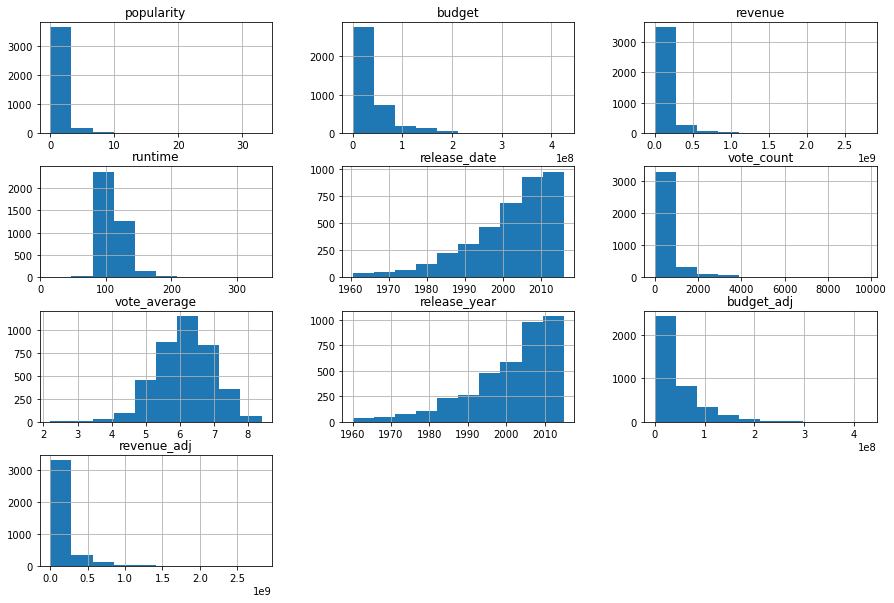

In [12]:
imdb_df.hist(figsize=(15,10));

#### What I can see here is:
>
>- Vote average is normally distributed.

>- Values in release date and year is increasing every year.

<a id='eda'></a>
## Exploratory Data Analysis

####   let's try and answer some questions.

### Does the film industry improved over the years?

#### List of figures for this question :-
- Profit over the years.
- Number of movies over the years.
- Movies popularity before and after 2000.
- Voters count over the years.
- Vote average over the years.
- Profit, Budget and Revenue before and after 2000. `(revenue figure not excpected results but why!)`
- Number of movies losing money before and after 2000.

#### I need pure profit to fairly compare all the movies together so let's make new very important column called `profit`, and it's the defference between budget and revenue.

In [13]:
imdb_df['profit'] = imdb_df['revenue'] - imdb_df['budget']
imdb_df.head(3)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Director,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,Colin Trevorrow,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,George Miller,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,Robert Schwentke,1.852382e+08


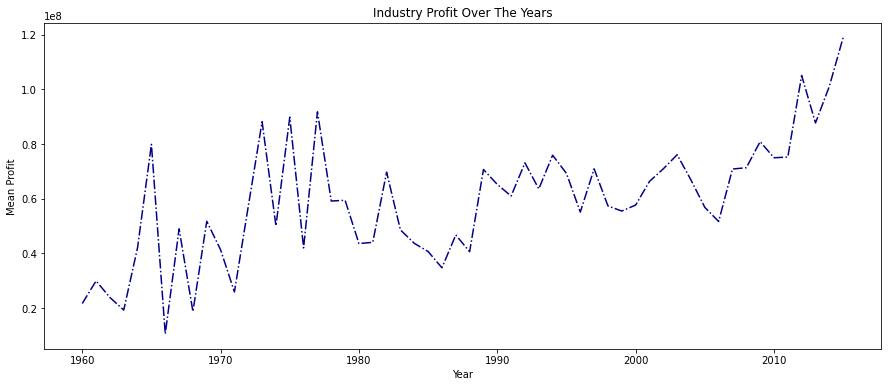

In [14]:
profit_over_time = imdb_df.groupby(['release_year'])['profit'].mean()
profit_over_time.plot(title='Industry Profit Over The Years', figsize=(15,6), linestyle='-.', color='darkblue');
plt.ylabel('Mean Profit');
plt.xlabel('Year');

+ve correlation. Great!

This means the industry is growing but money is not everything.

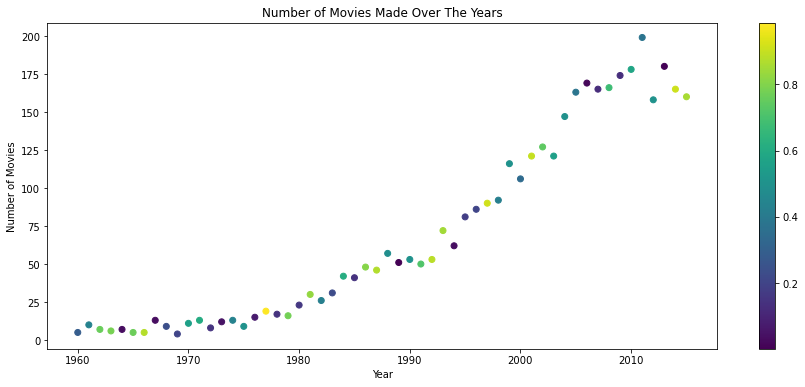

In [15]:
movies_in_year = imdb_df.groupby(['release_year'])['original_title'].count()
movies_in_year = movies_in_year.reset_index()
colors = np.random.random(56)
plt.figure(figsize=(15, 6));
plt.scatter(movies_in_year['release_year'], movies_in_year['original_title'], c=colors, cmap='viridis');
plt.xlabel('Year');
plt.ylabel('Number of Movies');
plt.title('Number of Movies Made Over The Years');
plt.colorbar();

Another but more clearly +ve correlation.

The growing becoming more realistic now.

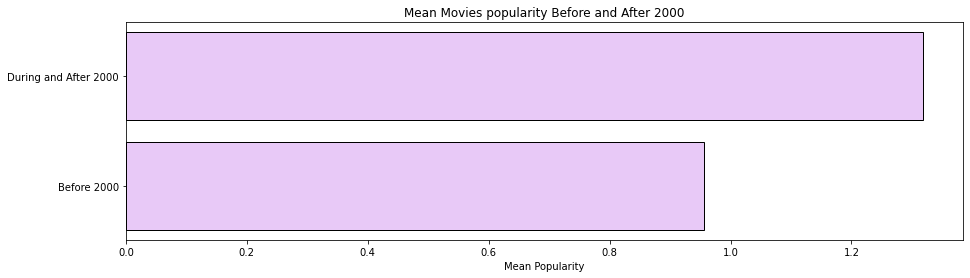

In [16]:
popularity_in_year = imdb_df.groupby(['release_year'])['popularity'].mean()
popularity_in_year = popularity_in_year.reset_index()
popularity_in_year_befor_2000 = popularity_in_year[popularity_in_year['release_year'] < 2000]
popularity_in_year_after_2000 = popularity_in_year[popularity_in_year['release_year'] >= 2000]
mean_popularity_in_year_befor_2000 = popularity_in_year_befor_2000['popularity'].mean()
mean_popularity_in_year_after_2000 = popularity_in_year_after_2000['popularity'].mean()
x_axis = ['Before 2000', 'During and After 2000']
values = [mean_popularity_in_year_befor_2000, mean_popularity_in_year_after_2000]
plt.figure(figsize=(15,4));
plt.barh(x_axis, values, color=(0.7, 0.3, 0.9, 0.3), edgecolor='black');
plt.xlabel('Mean Popularity');
plt.title('Mean Movies popularity Before and After 2000');

Popularity increased cause peaple like what they see and pay for it.

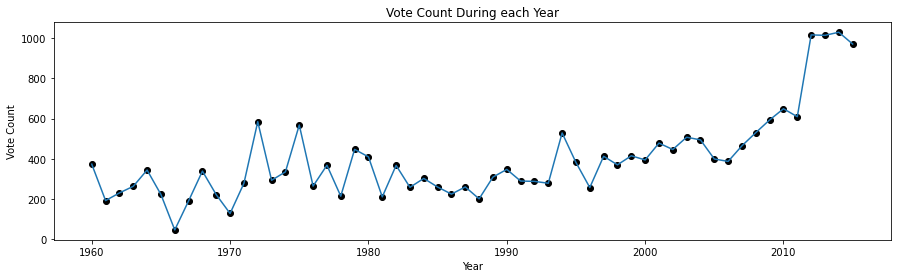

In [17]:
vote_count = imdb_df.groupby(['release_year'])['vote_count'].mean()
vote_count = vote_count.reset_index()
x = vote_count['release_year']
y = vote_count['vote_count']
plt.figure(figsize=(15,4));
plt.scatter(x, y, color='black');
plt.plot(x, y);
plt.xlabel('Year');
plt.ylabel('Vote Count');
plt.title('Vote Count During each Year');

Slightly more voters over time. `not very strong`

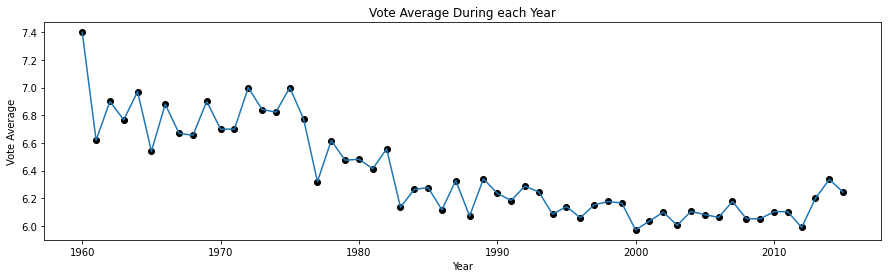

In [18]:
vote_average = imdb_df.groupby(['release_year'])['vote_average'].mean()
vote_average = vote_average.reset_index()
x = vote_average['release_year']
y = vote_average['vote_average']
plt.figure(figsize=(15,4));
plt.scatter(x, y, color='black');
plt.plot(x, y);
plt.xlabel('Year');
plt.ylabel('Vote Average');
plt.title('Vote Average During each Year');

It seems like the quality of movies is geetting down.

Me as a big fan of cinema I guarantee that...

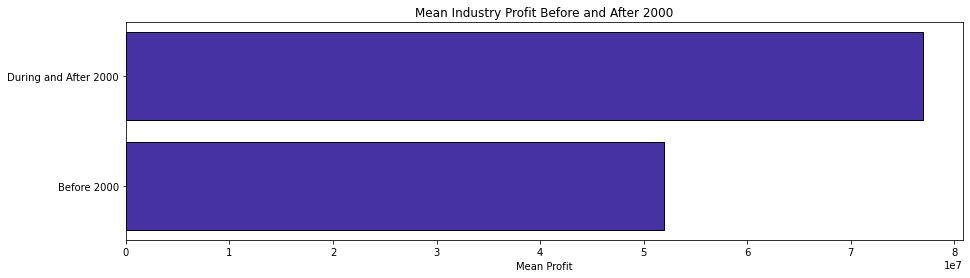

In [19]:
profit_in_year = imdb_df.groupby(['release_year'])['profit'].mean().reset_index()
profit_in_year_befor_2000 = profit_in_year[profit_in_year['release_year'] < 2000]
profit_in_year_after_2000 = profit_in_year[profit_in_year['release_year'] >= 2000]
mean_profit_in_year_befor_2000 = profit_in_year_befor_2000['profit'].mean()
mean_profit_in_year_after_2000 = profit_in_year_after_2000['profit'].mean()
x_axis = ['Before 2000', 'During and After 2000']
values = [mean_profit_in_year_befor_2000, mean_profit_in_year_after_2000]
plt.figure(figsize=(15,4));
plt.barh(x_axis, values, color=(0.2, 0.11, 0.6, 0.9), edgecolor='black');
plt.xlabel('Mean Profit');
plt.title('Mean Industry Profit Before and After 2000');

We've seen the profit increasing over the years, and this graph assures industry improvement.

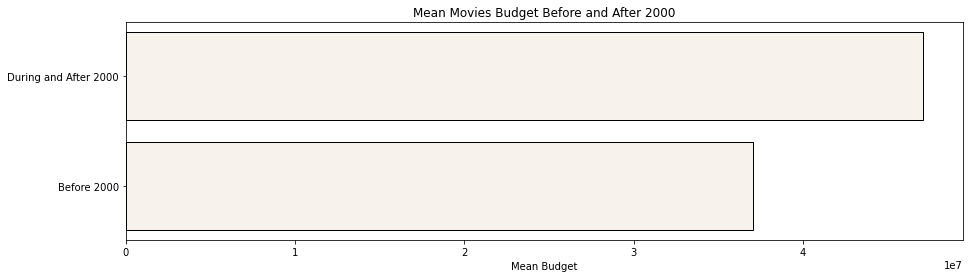

In [20]:
budget_in_year = imdb_df.groupby(['release_year'])['budget_adj'].mean()
budget_in_year = budget_in_year.reset_index()
budget_in_year_befor_2000 = budget_in_year[budget_in_year['release_year'] < 2000]
budget_in_year_after_2000 = budget_in_year[budget_in_year['release_year'] >= 2000]
mean_budget_in_year_befor_2000 = budget_in_year_befor_2000['budget_adj'].mean()
mean_budget_in_year_after_2000 = budget_in_year_after_2000['budget_adj'].mean()
x_axis = ['Before 2000', 'During and After 2000']
values = [mean_budget_in_year_befor_2000, mean_budget_in_year_after_2000]
plt.figure(figsize=(15,4));
plt.barh(x_axis, values, color=(0.74, 0.50, 0.33, 0.1), edgecolor='black');
plt.xlabel('Mean Budget');
plt.title('Mean Movies Budget Before and After 2000');

Producers put more money over time into a very successful industry as we saw.

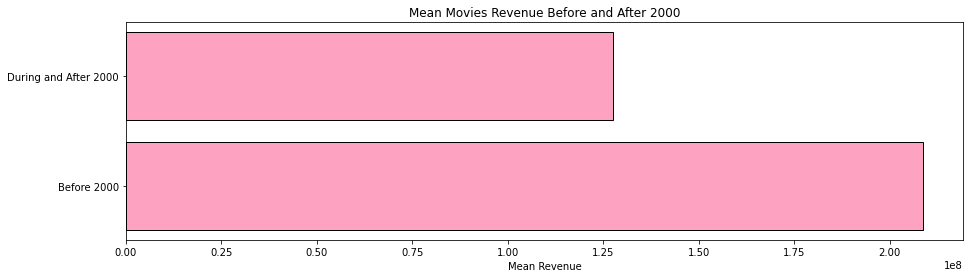

In [21]:
revenue_in_year = imdb_df.groupby(['release_year'])['revenue_adj'].mean()
revenue_in_year = revenue_in_year.reset_index()
revenue_in_year_befor_2000 = revenue_in_year[revenue_in_year['release_year'] < 2000]
revenue_in_year_after_2000 = revenue_in_year[revenue_in_year['release_year'] >= 2000]
mean_revenue_in_year_befor_2000 = revenue_in_year_befor_2000['revenue_adj'].mean()
mean_revenue_in_year_after_2000 = revenue_in_year_after_2000['revenue_adj'].mean()
x_axis = ['Before 2000', 'During and After 2000']
values = [mean_revenue_in_year_befor_2000, mean_revenue_in_year_after_2000]
plt.figure(figsize=(15,4));
plt.barh(x_axis, values, color=(0.99, 0.4, 0.6, 0.6), edgecolor='black');
plt.xlabel('Mean Revenue');
plt.title('Mean Movies Revenue Before and After 2000');

#### BUT HOW! THE PROFIT IS INCREASING!!

##### let's see what's happening...

In [22]:
befor_2000_df = imdb_df[imdb_df['release_year'] < 2000]
after_2000_df = imdb_df[imdb_df['release_year'] >= 2000]

In [23]:
befor_2000_df['negative_profit'] = befor_2000_df['budget_adj'] > befor_2000_df['revenue_adj']
print('Number of movies losing money before 2000 = {}'.format(befor_2000_df['negative_profit'].sum()))

Number of movies losing money before 2000 = 326


E:\New folder\FwdDataAnalysis\Professional\Anaconda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [24]:
after_2000_df['negative_profit'] = after_2000_df['budget_adj'] > after_2000_df['revenue_adj']
print('Number of movies losing money after 2000 = {}'.format(after_2000_df['negative_profit'].sum()))

Number of movies losing money after 2000 = 746


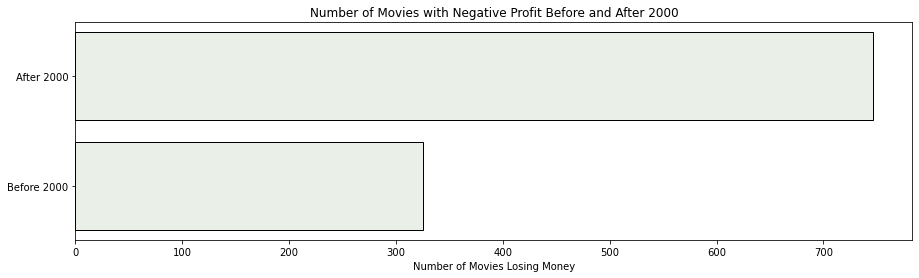

In [25]:
plt.figure(figsize=(15,4));
plt.barh(['Before 2000', 'After 2000'], [325, 746],color=(0.2, 0.4, 0.1, 0.1), edgecolor='black');
plt.xlabel('Number of Movies Losing Money');
plt.title('Number of Movies with Negative Profit Before and After 2000');

ah ok..  Now there is alot more movies lost after 2000 than before, this is logically right as there is far more movies made after 2000.

This drops the mean revenue down but still profits are high.

#### The industry made very good improvements in terms of profit and popularity over the years.

>

### What is the most profitable season?

#### List of figures:-
- Most popular season.

- Profit by month.

- Most profitable season.





#### With the help of `release_date` column I will extract the `month` and use it to make a new `season` column.

#### Defined new function `season_column` which take month number and return the season as string or object.

In [26]:
imdb_df['month']= imdb_df['release_date'].dt.month
def season_column(month):
    seasons = {'spring': (3, 4, 5),
               'summer': (6, 7, 8),
               'autumn': (9, 10, 11)}
    if month in seasons['spring']:
        return 'spring'
    if month in seasons['summer']:
        return 'summer'
    if month in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'
imdb_df['season'] = imdb_df['month'].map(season_column)
imdb_df.head(3)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Director,profit,month,season
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,Colin Trevorrow,1.363529e+09,6,summer
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,George Miller,2.284364e+08,5,spring
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,Robert Schwentke,1.852382e+08,3,spring


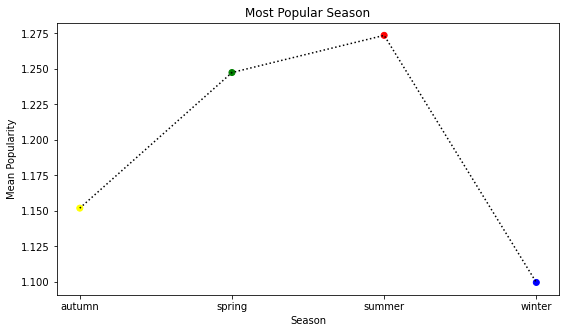

In [27]:
most_popular_season = imdb_df.groupby(['season'])['popularity'].mean()
most_popular_season = most_popular_season.reset_index()
plt.figure(figsize=(9,5));
plt.scatter(most_popular_season.season, most_popular_season.popularity, color=['yellow', 'green', 'red', 'blue']);
plt.plot(most_popular_season.season, most_popular_season.popularity, linestyle='dotted', color='black');
plt.xlabel('Season');
plt.ylabel('Mean Popularity');
plt.title('Most Popular Season');

We can see as most of us expected that `summer` is the most popular to go to the movies then `spring`.

But just popular?

What about money?



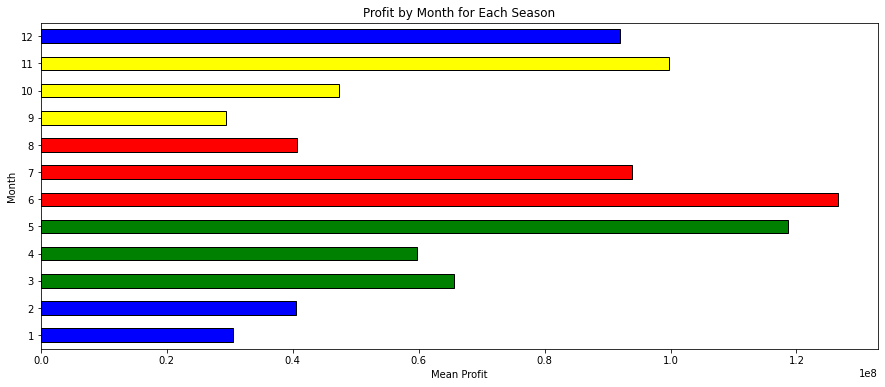

In [28]:
profit_per_month = imdb_df.groupby(['month'])['profit'].mean().sort_index()
colors = ['blue', 'blue', 'green', 'green', 'green', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'blue']
profit_per_month.plot(kind='barh',figsize=(15,6), color=colors, edgecolor='black', title='Profit by Month for Each Season');
plt.xlabel('Mean Profit');
plt.ylabel('Month');

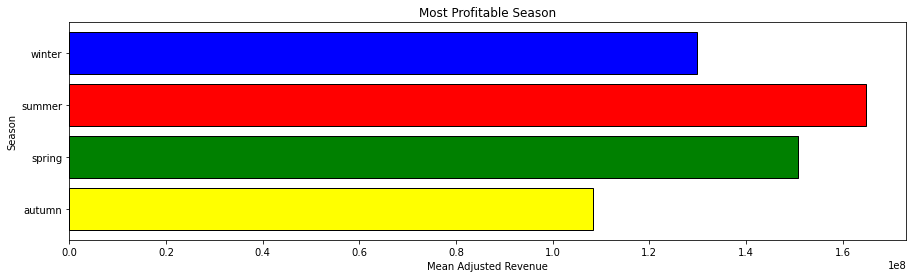

In [29]:
best_season = imdb_df.groupby(['season'])['revenue_adj'].mean()
best_season = best_season.reset_index()
plt.figure(figsize=(15,4));
plt.barh(best_season.season, best_season.revenue_adj, color=['yellow', 'green', 'red', 'blue'], edgecolor='black');
plt.ylabel('Season');
plt.xlabel('Mean Adjusted Revenue');
plt.title('Most Profitable Season');

### Now the most profitable season is also `summer` as expected with `spring` comes on second.

### Top 15 lists.
#### List of figures:-
- Top profitable movies.
- Top adjusted revenure movies.
- Top vote average movies.
- Top budget movies.
- Top profitabble directors.
- Top quality directors (vote average).
- Top popular directors.
- Top directors in movies count.

> #### You can see the movies titles and directors names on the graph sorted `from top to bottom`...

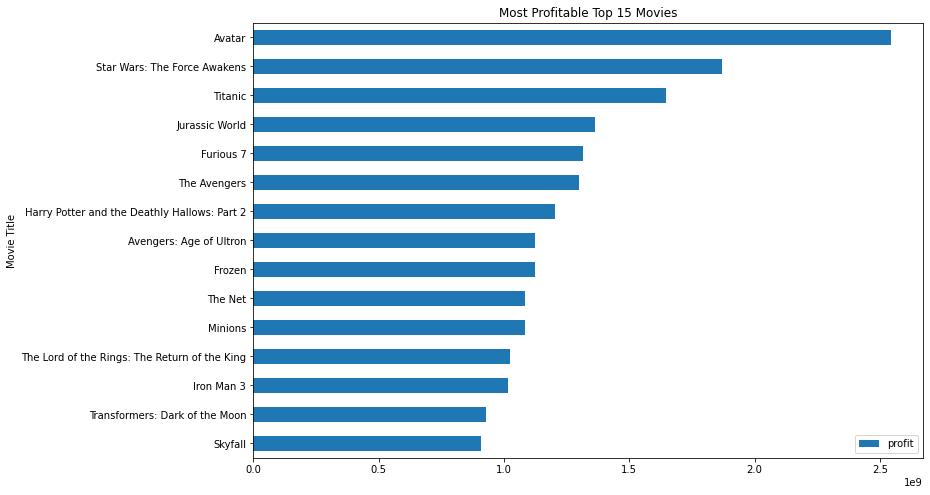

In [30]:
movies_profit_sorted_df = imdb_df[['original_title', 'profit']].sort_values(by=['profit']).tail(15).set_index(['original_title'])
movies_profit_sorted_df.plot(kind='barh', title='Most Profitable Top 15 Movies', figsize=(12,8));
plt.ylabel('Movie Title');
#plt.xlabel('Profit'); we don't need this..

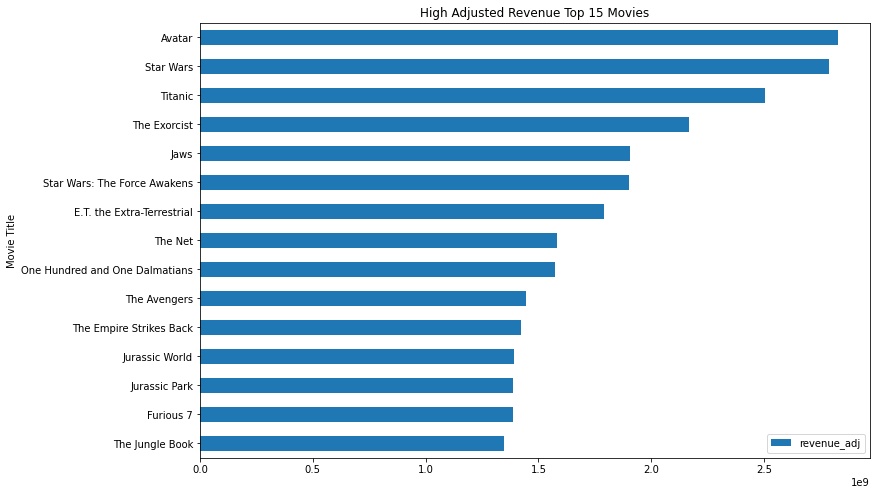

In [31]:
movies_revenue_sorted_df = imdb_df[['original_title', 'revenue_adj']].sort_values(by=['revenue_adj']).tail(15).set_index(['original_title'])
movies_revenue_sorted_df.plot(kind='barh', title='High Adjusted Revenue Top 15 Movies', figsize=(12,8));
plt.ylabel('Movie Title');

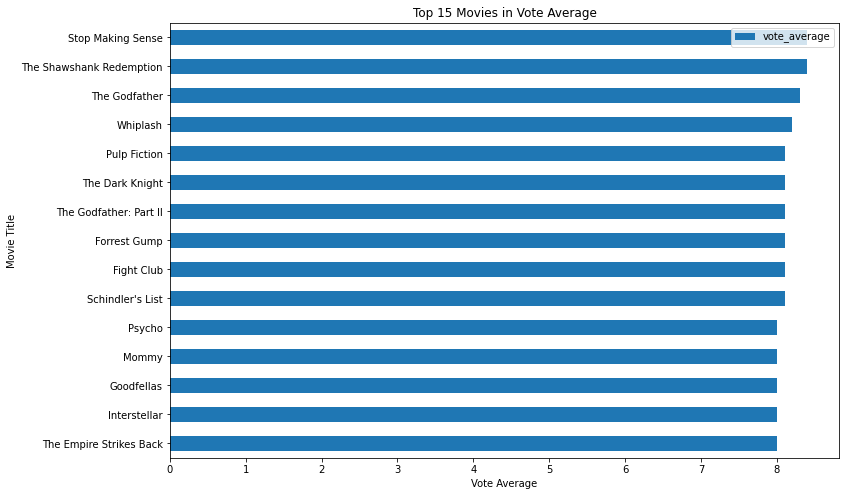

In [32]:
movies_vote_average_sorted_df = imdb_df[['original_title', 'vote_average']].sort_values(by=['vote_average']).tail(15).set_index(['original_title'])
movies_vote_average_sorted_df.plot(kind='barh', title='Top 15 Movies in Vote Average', figsize=(12,8));
plt.ylabel('Movie Title');
plt.xlabel('Vote Average');

I saw all these movies and except first and last one. they are all great but `Mommy` is amazing french movie.

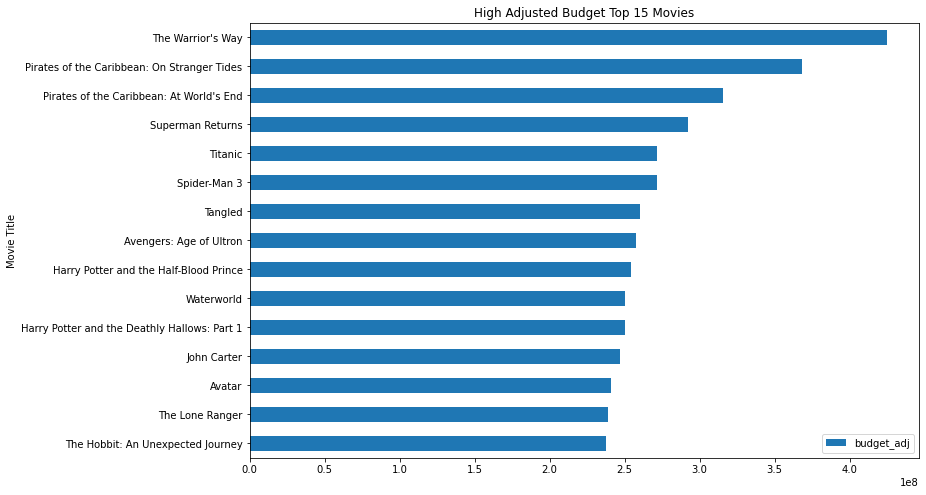

In [33]:
movies_budget_sorted_df = imdb_df[['original_title', 'budget_adj']].sort_values(by=['budget_adj']).tail(15).set_index(['original_title'])
movies_budget_sorted_df.plot(kind='barh', title='High Adjusted Budget Top 15 Movies', figsize=(12,8));
plt.ylabel('Movie Title');

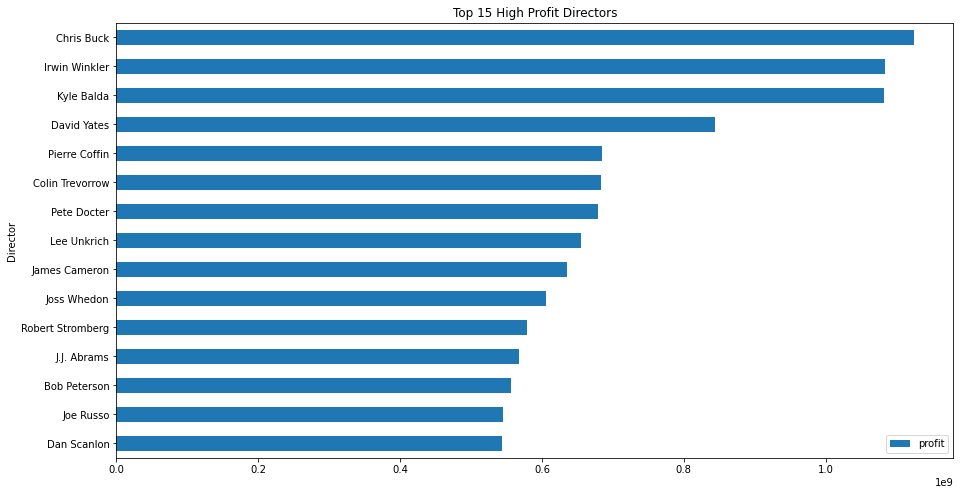

In [34]:
directors_profit_df = imdb_df[['Director', 'profit']].groupby(['Director'])['profit'].mean().reset_index().sort_values(by=['profit']).set_index(['Director']).tail(15)
directors_profit_df.plot(kind='barh', title='Top 15 High Profit Directors', figsize=(15,8));
plt.ylabel('Director');

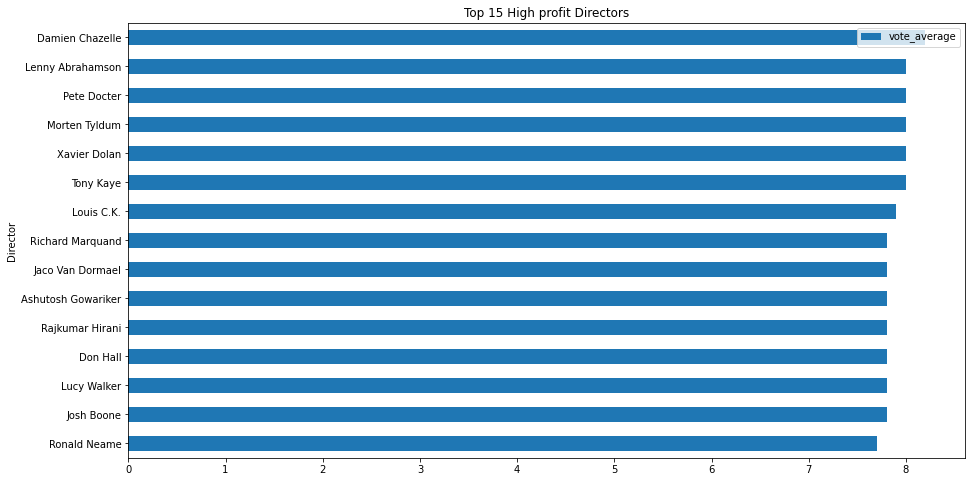

In [35]:
directors_vote_average_df = imdb_df[['Director', 'vote_average']].groupby(['Director'])['vote_average'].mean().reset_index().sort_values(by=['vote_average']).set_index(['Director']).tail(15)
directors_vote_average_df.plot(kind='barh', title='Top 15 High profit Directors', figsize=(15,8));
plt.ylabel('Director');

I love Louis C.K.

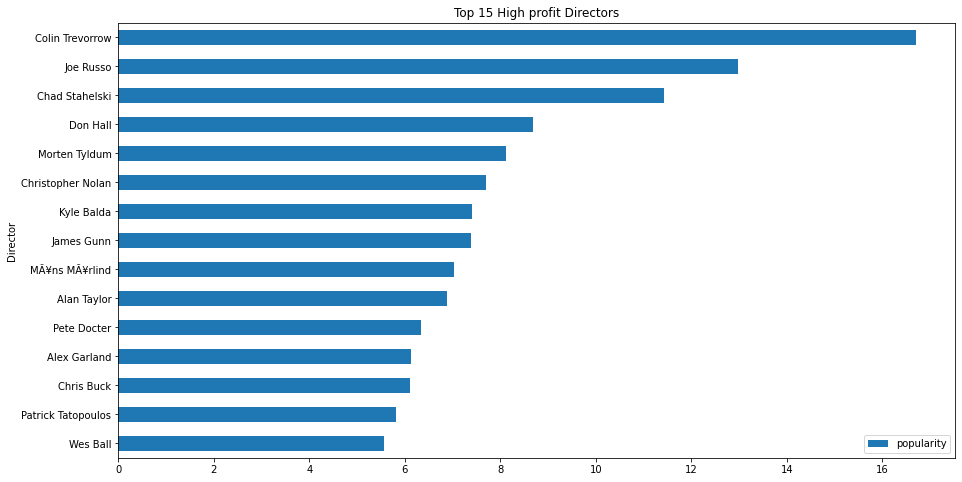

In [36]:
directors_popularity_df = imdb_df[['Director', 'popularity']].groupby(['Director'])['popularity'].mean().reset_index().sort_values(by=['popularity']).set_index(['Director']).tail(15)
directors_popularity_df.plot(kind='barh', title='Top 15 High profit Directors', figsize=(15,8));
plt.ylabel('Director');

And Nolan is here.

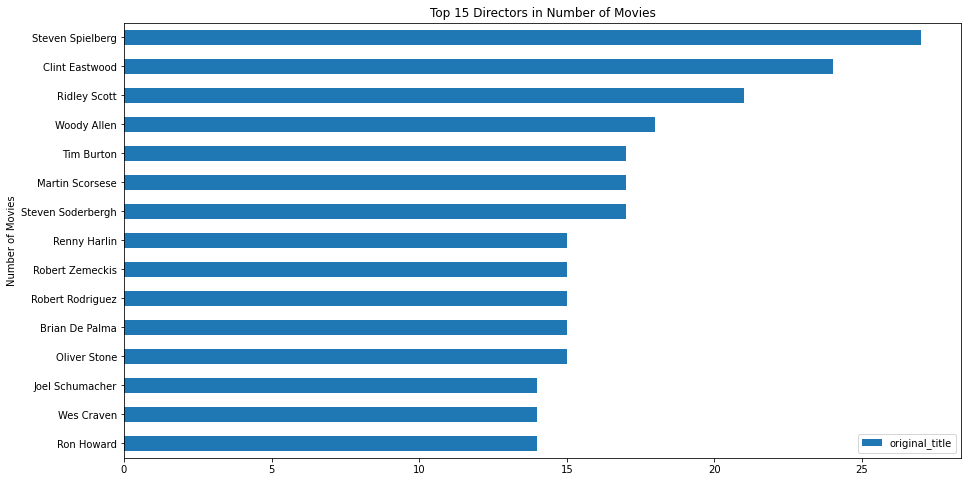

In [37]:
directors_movie_count_df = imdb_df[['Director', 'original_title']].groupby(['Director'])['original_title'].count().reset_index().sort_values(by=['original_title']).set_index(['Director']).tail(15)
directors_movie_count_df.plot(kind='barh', title='Top 15 Directors in Number of Movies', figsize=(15,8));
plt.ylabel('Director');
plt.ylabel('Number of Movies');

Cliend Eastwood is starring in a new western movie called `Cry Macho` as director and leading actor.

<a id='conclusions'></a>
## Conclusions

> ### Film industry improves over the years in terms of :
> - Profit, budget, popularuty, number of movies and voters count.

> ### Film industry drops over the years in terms of :
> - Vote average (quality), number of movies losing.

> ### The summer is the most popular and profitable season,then becomes the spring.


## Limitations

- I can't remove the column name from some graphs as it looks messy like in `Top 15 High Profit Director`.
- Handling `cast` and `genres` columns would be interesting, I think I can do it but it'll take more time and effort.
- Graphs have to be improved using seaborn.
- Losing most of the data because of the zeroes, I know there is a better way like forward fill or filling by average.
- The markdown cells could be much better.